In [2]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
data = pd.read_csv('final_training_data.csv').iloc[:, 1:]

Age dependency ratio, young Outliers


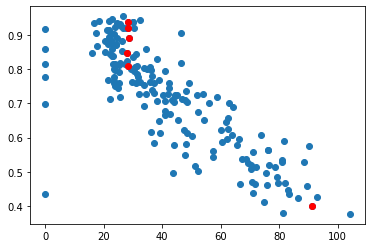

GNI per capita, Atlas method (current US$) Outliers


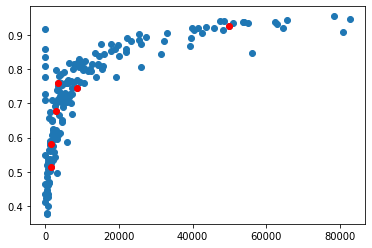

Human capital index (HCI) (scale 0-1) Outliers


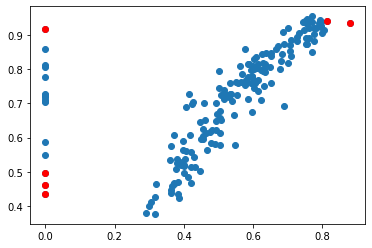

Human capital index (HCI), lower bound (scale 0-1) Outliers


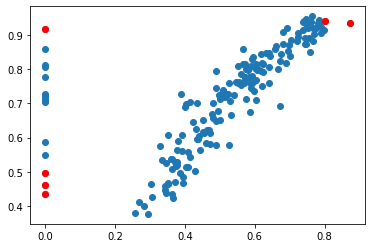

Human capital index (HCI), upper bound (scale 0-1) Outliers


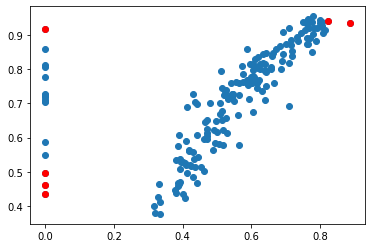

People using at least basic drinking water services (% of population) Outliers


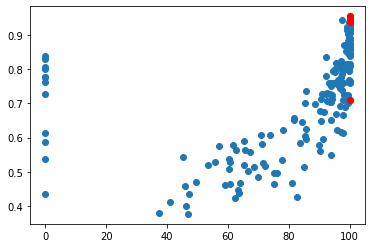

People using at least basic sanitation services (% of population) Outliers


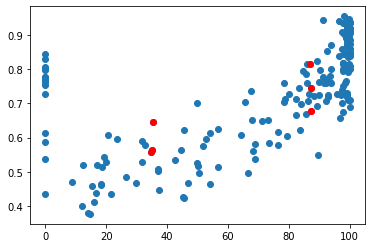

Population ages 00-04, female (% of female population) Outliers


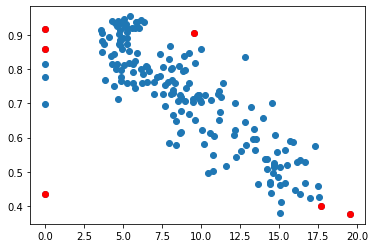

Population ages 00-04, male (% of male population) Outliers


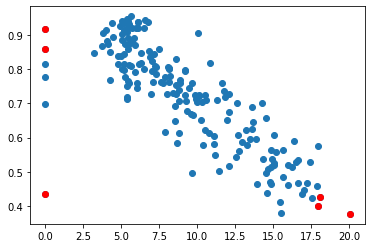

Population ages 0-14 (% of total population) Outliers


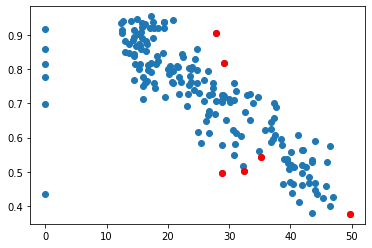

Population ages 0-14, female (% of female population) Outliers


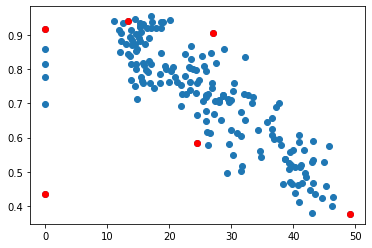

Population ages 0-14, male (% of male population) Outliers


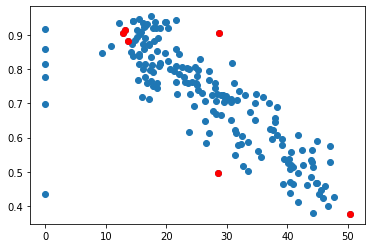

Population ages 05-09, male (% of male population) Outliers


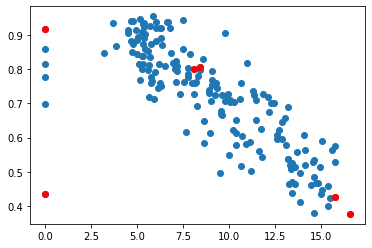

Population ages 10-14, female (% of female population) Outliers


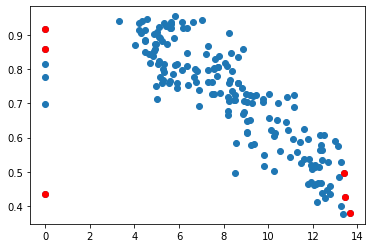

Population ages 10-14, male (% of male population) Outliers


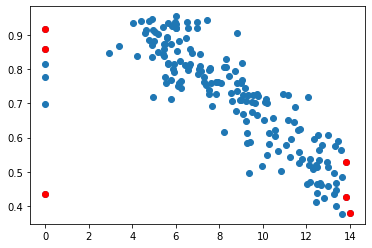

Population ages 15-19, female (% of female population) Outliers


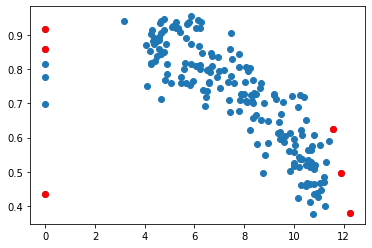

Population ages 15-19, male (% of male population) Outliers


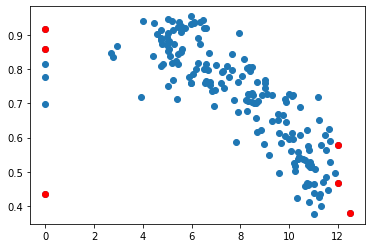

Population ages 20-24, female (% of female population) Outliers


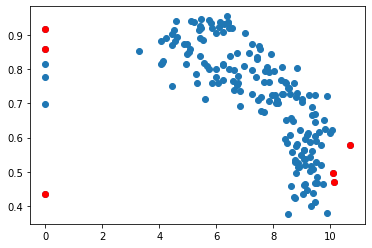

Population ages 20-24, male (% of male population) Outliers


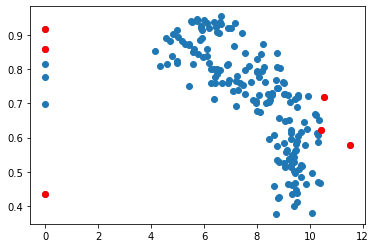

Population ages 45-49, male (% of male population) Outliers


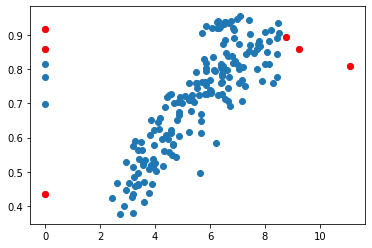

Population ages 50-54, male (% of male population) Outliers


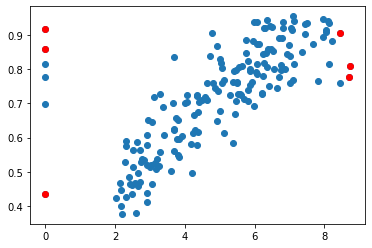

Population ages 55-59, male (% of male population) Outliers


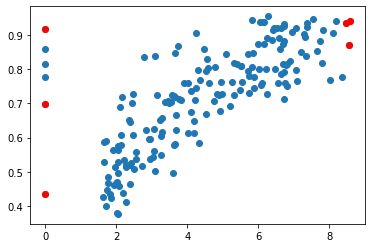

Tuberculosis death rate (per 100,000 people) Outliers


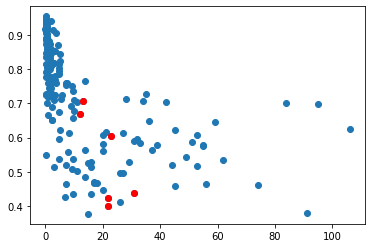

Urban population growth (annual %) Outliers


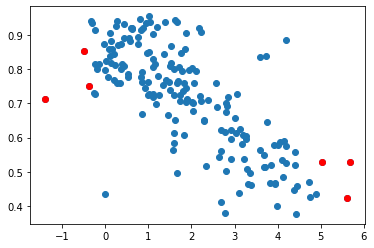

transformed_High income Outliers


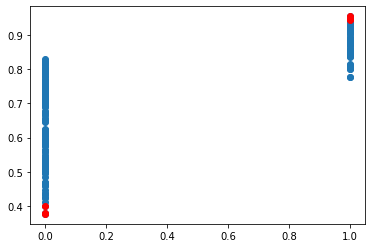

transformed_Low income Outliers


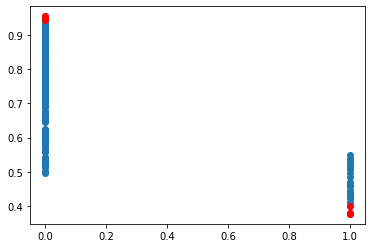

transformed_Lower middle income Outliers


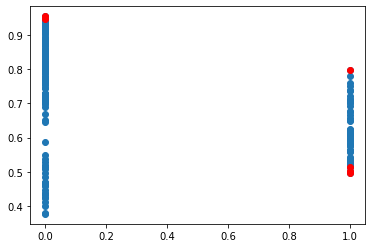

transformed_Upper middle income Outliers


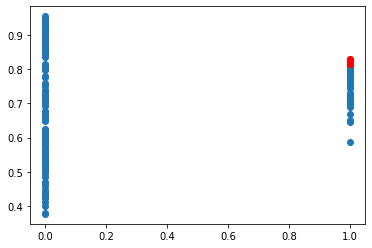

In [73]:
for i in range(len(data.columns)-1):
    
    print(data.columns[i] + " Outliers")
    
    svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.03)

    pred = svm.fit_predict(pd.concat([data.iloc[:,i], data.iloc[:, -1]], axis=1))
    scores = svm.score_samples(pd.concat([data.iloc[:,i], data.iloc[:, -1]], axis=1))

    thresh = quantile(scores, 0.03)
    index = where(scores<=thresh)
    values = data.iloc[index[0].tolist(), :]

    plt.scatter(data.iloc[:,i], data.iloc[:,-1])
    plt.scatter(values.iloc[:,i], values.iloc[:,-1], color='r')
    plt.show()